# Colab データインストール

In [0]:
# 以下を実行すると、認証情報を取得するための許可を求められるので、許可してトークンを発行し、テキストボックスに貼り付ける。
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

In [0]:
# Colabにおいてデータを読みこむ。グーグルドライブをマウントします。その為に必要なパッケージを取得しておく。
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


In [0]:
# 以下実行により、今度は google-drive-ocamlfuse によるアクセスの許可を聞かれる。これも許可する。
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [4]:
# 今回は指定したフォルダのみマウントする
!cp -f ~/.gdfuse/default/config config
!sed -i -e "s/^root_folder=$/root_folder=1FwGdPnKlcYYRe1mZGE5Ci-PWlIY8k5J7/" config
# 上記が正常に終われば、ようやくマウントが可能となる。
!mkdir -p drive
!google-drive-ocamlfuse -config ./config -cc drive
!ls drive

Clearing cache...done
8_3-4			    dataset				  week3-EDA
8_5-6			    Kaggle_0				  week4
compare-deeplibs.ipynb	    Santander_Value_Prediction_Challenge
dataマウントテンプレ.ipynb  test.ipynb


In [5]:
# これ以降はターミナルと同様にディレクトリを扱える
ls

config  datalab/  drive/


In [6]:
cd drive

/content/drive


In [7]:
ls

8_3-4/                      dataset/                               week3-EDA/
8_5-6/                      Kaggle_0/                              week4/
compare-deeplibs.ipynb      Santander_Value_Prediction_Challenge/
dataマウントテンプレ.ipynb  test.ipynb


In [8]:
cd /content/drive/dataset/House Prices_data

/content/drive/dataset/House Prices_data


In [9]:
ls

data_description.odt   sample_submission.csv.gz  train.csv
data_description.txt   test.csv                  train.csv.gz
sample_submission.csv  test.csv.gz               train.ods


# ライブラリimport

In [0]:
# pandas and numpy for data manipulation
import numpy as np
import pandas as pd 

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [0]:
# pandasのデータの表示設定
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_row', 20)

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [15]:
g_s = train_df[['GrLivArea', 'SalePrice']]
g_s

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
5,1362,143000
6,1694,307000
7,2090,200000
8,1774,129900
9,1077,118000


In [16]:
g_s = train_df[['GrLivArea', 'YearBuilt']]
g_s

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
5,1362,1993
6,1694,2004
7,2090,1973
8,1774,1931
9,1077,1939


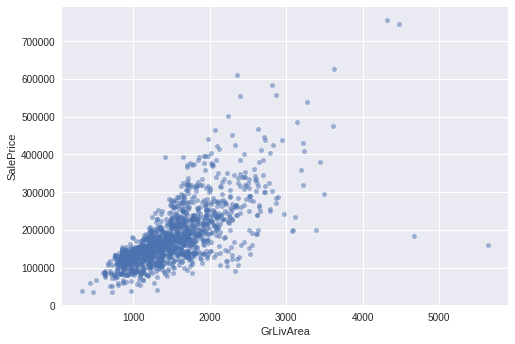

In [17]:
train_df.plot.scatter(x='GrLivArea', y='SalePrice', alpha=0.5)

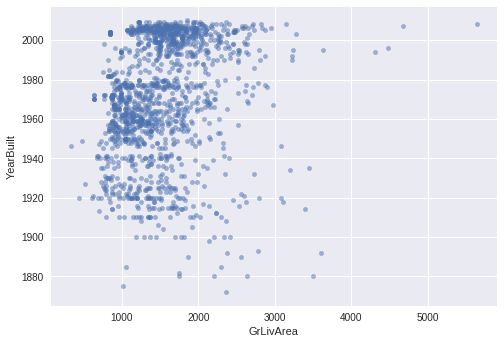

In [18]:
train_df.plot.scatter(x='GrLivArea', y='YearBuilt', alpha=0.5)

# Xとyの準備をする

In [19]:
# FeatureとTargetの準備
X = train_df[['GrLivArea', 'YearBuilt']]
y = train_df['SalePrice']
X.head()


,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


## X_testとy_testも準備しておく

In [0]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3)

## Xとyを扱う

### Xをnp.arrayに変換

In [21]:
# Xをnp.arrayに変換
X = X.values
print(X)

[[1056 1980]
 [1504 1996]
 [1362 1920]
 ...
 [2058 1917]
 [1484 1914]
 [ 864 1925]]


In [22]:
# Xの標準化
X_std = (X - X.mean())/ X.std()
X_std


array([[-1.58916073,  0.5593506 ],
       [-0.54745826,  0.59655426],
       [-0.87764074,  0.41983688],
       ...,
       [ 0.74071844,  0.41286119],
       [-0.59396284,  0.40588551],
       [-2.03560464,  0.43146302]])

In [23]:
# xに切片(=1)を追加
X_std_bias=np.insert(X_std,0,1,axis=1)
X_std_bias

array([[ 1.        , -1.58916073,  0.5593506 ],
       [ 1.        , -0.54745826,  0.59655426],
       [ 1.        , -0.87764074,  0.41983688],
       ...,
       [ 1.        ,  0.74071844,  0.41286119],
       [ 1.        , -0.59396284,  0.40588551],
       [ 1.        , -2.03560464,  0.43146302]])

### yをnp.arrayに変換


In [24]:
# yをarrayに変換
Y = y.values
Y


array([144000, 203000, 128000, ..., 129500, 128000,  98000])

In [25]:
# y_numを正規化
Y_std = (Y - Y.mean())/ Y.std()
Y_std

array([-0.46875022,  0.29600442, -0.67614131, ..., -0.65669839,
       -0.67614131, -1.0649996 ])

## X_testとy_testを扱う

### X_test  をArrayに変換

In [0]:
X_test = X_test.values
X_test_std = (X_test - X_test.mean())/ X_test.std()
X_test_std_bias=np.insert(X_test_std,0,1,axis=1)



### y_test  をArrayに変換

In [0]:
Y_test = y_test.values
Y_test_std = (Y_test - Y_test.mean())/ Y_test.std()

# 損失関数定義：cost_function

In [0]:
def compute_cost(X, y, theta):

    #sample 数
    ids = len(X)
    #naiseki
    naiseki = np.dot(X, theta)
    #distance
    distance = (naiseki - y) # (Hypothesis value -- Actual value)
    #distance**2 の合計
    total_distance = (distance**2).sum()
    #total_distanceの平均
    J = total_distance / (2 * ids)
    
    return J

## 損失計算

In [29]:
# theta=weightの設定
theta = np.random.rand(X_std_bias.shape[1])
theta

array([0.53550941, 0.34048272, 0.4128092 ])

In [30]:
# Cost算出
compute_cost(np.array(X_std_bias), Y_std, theta)

0.4454865013773483

# 最急降下法(勾配降下法、GradientDescent)

In [0]:
def gradient_descent(X, y, theta, iterations, alpha):

    #ここにいれていく
    past_costs = []
    past_thetas = [theta]
    m = len(X)
    
    for i in range(iterations):
        #距離を出す
        distance = (np.dot(X, theta) - y) 
        #勾配を出す
        gradient = np.dot(X.T, distance) /m
        #thetaを更新
        theta = theta - (alpha * gradient)
        # New Cost
        new_cost = compute_cost(X, y, theta)

        # thetaとcostを保持する変数past_costsとpast_thetasに順次過去の値をappendする
        past_costs.append(new_cost)
        past_thetas.append(theta)
    return past_costs, past_thetas

##   計算

In [0]:
alpha = 0.01
iterations = 100

In [0]:
theta = np.random.rand(X_std_bias.shape[1])

In [0]:
#計算します
gradient_descent(np.array(X_std_bias), Y_std, theta, iterations, alpha)




## 線形回帰における最急降下法の導出式を記述せよ

$ \theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\ $　の　$ J(\theta) $は  

$ J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 $でした  

よって偏微分$ \frac{\partial}{\partial \theta_j}\frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 $となります  

カッコ内を$ u $と見たとき、$ u^2 $となるため、微分すると$ 2u $です。  

よて
$ \theta_j := \theta_j  −\frac{1}{m}\sum_{i=1}^{m}((h_θ(x_i)−y_i)x_j) $  

が求まり、ここに学習率$ α $の概念を加えてあげて  

$ \theta_j := \theta_j  −α\frac{1}{m}\sum_{i=1}^{m}((h_θ(x_i)−y_i)x_j) $となる

## 最急降下法について、なぜ局所最適解が得られる場合があるか答えよ
但し、線形回帰の場合は局所最適解ではなく、最適解が得られる。この理由も述べよ

結局のところ最急降下法は二次関数になりますので、それは3次元空間のなかで、ボウル(お料理に使うボウル)のような形状になります。  
これを上から下るとして、最も急斜面の方向というのが、微分ということになります。  
ただし3次元なので偏微分して、その方向に少しずつ変化させていきます。すると底に辿りつけるtめ、局所最適解が得られる場合があります。  

しかし、もし降っていった先の底だと思っていたところとは別の領域でより深い底があったとしたらこの原理では気づけません。イメージで言えば、Wの形の線の片方の底がが実はより深い底だった場合です。

# グラフ化

In [0]:
# Learning Curve Graphic
def cost_plot(X, y, theta, alpha, iterations):
    
    past_costs, _ =gradient_descent(X, y, theta, alpha, iterations)
    plt.xlabel('No.of iterations')
    plt.ylabel('Cost')
    plt.title("Cost Function")
    print("last cost : {}".format(past_costs[-1]))
    print("learning rate : {}".format(alpha))
    print("iteration : {}".format(iterations))
    plt.plot(past_costs)

In [0]:
alpha = 0.01
iterations = 400

last cost : 0.23669137428107404
learning rate : 400
iteration : 0.01


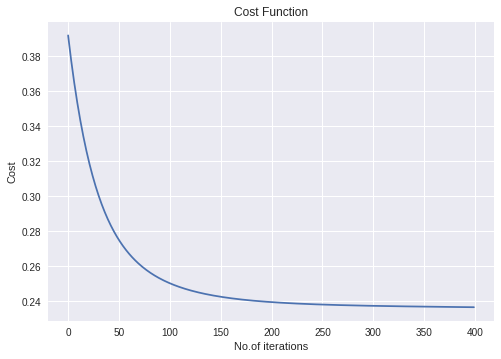

In [37]:
#Learning Curve 
cost_plot(np.array(X_std_bias), Y_std, theta, iterations, alpha)

# モデルロス

In [0]:
# Learning Curve Graphic
def model_loss(X_test, y_test, theta, alpha, iterations):
    
    validation_loss, _ =gradient_descent(X_test, y_test, theta, alpha, iterations)
    plt.xlabel('No.of iterations')
    plt.ylabel('Cost')
    plt.title("Model Loss")
    print("last cost : {}".format(validation_loss[-1]))
    print("learning rate : {}".format(alpha))
    print("iteration : {}".format(iterations))
    plt.plot(validation_loss)

In [0]:
alpha = 0.01
iterations = 400

last cost : 0.24668069551771554
learning rate : 400
iteration : 0.01


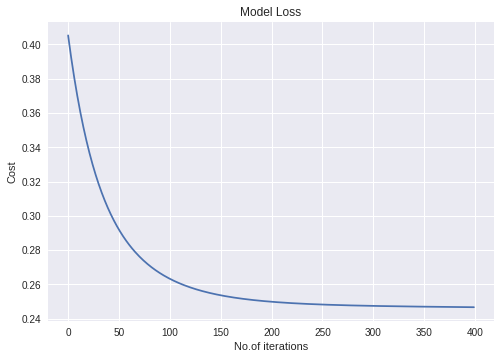

In [40]:
#Learning Curve 
model_loss(np.array(X_test_std_bias), Y_test_std, theta, iterations, alpha)

# 同時にPlotする

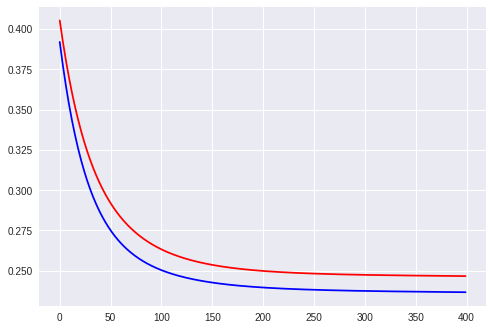

In [41]:
alpha = 0.01
iterations = 400

past_costs, _ =gradient_descent(np.array(X_std_bias), Y_std, theta, iterations, alpha)
validation_loss, _ =gradient_descent(np.array(X_test_std_bias), Y_test_std, theta, iterations, alpha)

x = past_costs
y = validation_loss

plt.plot(x, '-', color='blue')
plt.plot(y, '-', color='red')

# クラステスト

In [0]:
class LinearModel():

    def __init__(self):
        pass

    def compute_cost(self, X, y, theta):
        #sample 数
        ids = len(X)
        #naiseki
        naiseki = np.dot(X, theta)
        #distance
        distance = (naiseki - y) # (Hypothesis value -- Actual value)
        #distance**2 の合計
        total_distance = (distance**2).sum()
        #total_distanceの平均
        J = total_distance / (2 * ids)
        return J

    def gradient_descent(self, X, y, theta, iterations, alpha):
        #ここにいれていく
        past_costs = []
        past_thetas = [theta]
        m = len(X)

        for i in range(iterations):
            #距離を出す
            distance = (np.dot(X, theta) - y) 
            #勾配を出す
            gradient = np.dot(X.T, distance) /m
            #thetaを更新
            theta = theta - (alpha * gradient)
            # New Cost
            new_cost = compute_cost(X, y, theta)

            # thetaとcostを保持する変数past_costsとpast_thetasに順次過去の値をappendする
            past_costs.append(new_cost)
            past_thetas.append(theta)
        return past_costs, past_thetas
      
    def plot_learning_curve(self, X, y, theta, alpha, iterations):
      past_costs, _ =gradient_descent(X, y, theta, alpha, iterations)
      plt.xlabel('No.of iterations')
      plt.ylabel('Cost')
      plt.title("Cost Function")
      print("last cost : {}".format(past_costs[-1]))
      print("learning rate : {}".format(alpha))
      print("iteration : {}".format(iterations))
      plt.plot(past_costs)


In [43]:
model_test = LinearModel()
model_test.compute_cost(np.array(X_std_bias), Y_std, theta)

0.3970588386779726

In [0]:
model_test.gradient_descent(np.array(X_std_bias), Y_std, theta, iterations, alpha)

last cost : 0.23669137428107404
learning rate : 400
iteration : 0.01


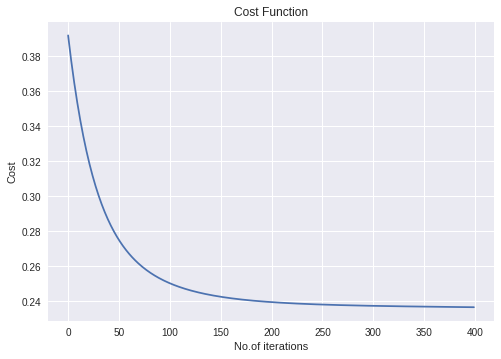

In [45]:
model_test.plot_learning_curve(np.array(X_std_bias), Y_std, theta, iterations, alpha)

# 前提知識の説明

## 教師あり学習  
分類問題  
回帰問題  


教師あり学習は、学習データに正解ラベルを付けて学習する方法です。  
例えば、花の名前を教えてくれるAIを作るのなら、学習データ（画像）に対して、これは「バラ」、これは「ボタン」というように正解のラベルを付けて学習させます。



*   分類問題 - カテゴリ別に分けてあるデータを学習し、未知のデータのカテゴリを予測します。例として、メールのスパム判定などが挙げられます。  

*   回帰問題 - 既存のデータから関係性を読み取り、その関係性を元にデータの予測を行う手法です。 予測される値は株価や宝石の時価などの連続した値になります。



## 教師なし学習  

 蓄積されたデータの構造や関係性を機械が見出すことを指します。 小売店の顧客の傾向やGoogleの画像認識などで用いられています。  
答えの与えられていないデ ータセットに対して、AIが自ら判断して答えを決める学習方法です。
他の例で言えば、最近ではECサイトなどでのレコメンデーションなどによく利用されています。



## 半教師あり学習

教師なし学習と教師あり学習との中間的な位置づけとして、半教師あり学習(半教師つき学習)があります  
例えば赤ちゃんの頃、犬か猫かわかっていないはずですが、いくつも見ていくうちにいつかおおよそ分類できるようになると思います。  
そうなってからの学習効率が良いのです、それを正解として学習するようになるからです。  
正解の無い(教師のいない)状態から正解の有る状態に移るのが半教師あり学習です。

専門的に言ってしまえば、教師ありデータから分類器を作り、それを使って教師なしデータにラベルを付け、そのうち確信度の高い分類結果を教師ありデータに追加し、学習する方法です。

## 強化学習

一言でいえば、飴とムチによる判断学習です。  
例えばAIに橋渡りをクリアするという目標を与えたとして、落ちたらNGだという評価を与ます。  
何度も落ち、繰り返すうちについにAIは上手に橋渡りを達成できるというような学習法です。  

今研究の分野で注目を集めているところでもあります。  

## フィーチャースケーリング

### 正規化(Normalization)

データを一定の方法で変形し、例えば身長と体重みたいな次元が違うものに対しても、なんとかして同じような単位で取り扱えるようにして、計算や比較しやすくしようという処理です。  
一言で、異なる種類のデータを1つの尺度にまとめるために行います。

数学的には、データを最大値を 1、最小値を 0 にすることです。  
例えば1,2,3,4,5 という 5 つのデータを、最大値が 1、最小値が 0 になるように正規化すると、  
「0, 0,25, 0.5, 0.75, 1.0」というように正規化されます

### 標準化(Standardization)

こちらも正規化の一種です。
しかし数学的な処理は異なるため注意します。  
平均0、分散1に変換する正規化です。
標準化する目的は、例えば「規模を比べる」という時に、  
その数字の単位があまりに揃っていない場合が考えられますが、その単位をそろえる処理です。  

数の例を見てみましょう  
1,2,3,4,5  という5つのデータを標準化すると  $\left(\dfrac{-2}{\sqrt{2}},\dfrac{-1}{\sqrt{2}},0,\dfrac{1}{\sqrt{2}},\dfrac{2}{\sqrt{2}}\right)$
このようになります。  
標準化は、平均と分散を考慮した上での数字の「大きさ」を得ることができるのです。



### 正規化と標準化の使い分け

正規化は最大値が1、最小値が0にするものでした対して  
標準化は平均0、分散1に変換するものでしたね。  

機械学習においては、正規化は問題が起こってしまうかもしれません。  
もし変換前の値のほとんどが1-10の値をとり、一つだけ10000だとします。  
すると、正規化をしてもほとんどの値が0付近になってしまいます。これではほとんど値の差の意味はなくなってしまいます。  

標準化は、その「外れ値」の影響を受けることなく差を表現できる反面  
もしかしたら「異常値」であるものに気づけない可能性を含んでいます。  

### フィーチャースケーリングのメリット

各変数のスケールが極端に異なると、最急降下法の計算に非常に多くの時間がかかってしまいます  
ですので、全ての変数にある値を乗算、除算して  
-1 <= x(i) <= 1  
または  
-0.5 <= x(i) <= 0.5 となるよう  
スケールを合わせることをします。

### $\theta_0$の役割

線形回帰モデルは、以下のように$\theta_0$つまり、切片が存在する。  

$ h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... +\theta_n x_n   (x_0 = 1)\\ $  

この$\theta_0$は、線形回帰モデルにおいてどのように役立っているか

まず、このθは何を示しているかというと、xがy軸と交差する点を示しています。  
この値を調整できないとすると、必ず原点を通る線を引かないといけなくなります。  
それではそれぞれの説明変数を表す直線を引く表現力が落ちてしまいます。  
つまり、より適切にhypothesis function(仮説関数)を引けなくなるかもしれないと考えられます。

##学習率
学習率について、どのような値から選択するべきか、それはなぜかを述べよ。
また、以下のキーワードを用いて説明すること  


Overfitting
Underfitting

言葉の説明からいたします
まず学習率とは、その理想の学習まで歩いた時の「歩幅」のようなものです。  
歩幅が大きすぎると、目的地を通り過ぎてしまうことが簡単にできてしまいます。  
逆に小さすぎるとその分計算の回数も必要になってしまいます。  

オーバーフィッティング（過学習）は、学習しすぎて汎用性がなくなってしまうことを指します。  
オーバーフィッティングしてしまうと、汎用性が高くないので、未知のデータに対しての予測がかなりはずれてしまいます。  

アンダーフィッティングは、オーバーフィッティングとは逆にフィッティングしないこと、つまり既知のデータにも未知のデータにも予測できないことを指します。  

学習率においては、歩幅が小さいと、その分データに合わせてしっかり学習するため過学習を起こしやすく、  
歩幅があまりに大きいとそもそも目的地の方向にすら歩かなくなりアンダーフィッティングを起こしたりします。

## 学習曲線について述べよ
学習曲線について述べよ。
また、以下のキーワードを説明することが必要となる。

どのような時に使用するか
学習曲線からどのようなことが分かるか

学習曲線とは、訓練データサイズを横軸に推論誤差あるいは推論精度をプロットした曲線を学習曲線といいます。推論精度は訓練データサイズに対して比例しません。ある程度のサイズがないと推論精度は向上しないし、ある程度以上の訓練データ量になると対数関数の様に訓練データサイズに対しての推論精度の向上率は鈍化します。  

どんな時に使用するかというと、例えば過学習を起こしていないかを見る時に見ます。  
learning curveとvalidation curveを見比べると、そのグラフの差によってどれほどか学習しているかがわかります。  

他にわかることは、未学習についてもわかります。  
あまりに精度が出ない時、そのモデルの手法から疑うこともできるようになります。  

## 正規方程式

thetaを求める方法として、最急降下法(GradientDescent)を使用するのではなく、正規方程式（Normal Equation）を使用する方法がある。最急降下法と正規方程式のメリットとデメリットを計算量と計算速度の観点から述べよ。

まず正規方程式は、条件さえ合えば解析的に最小二乗法が解ける式だけれども、大規模な疎行列のように特徴(変数)が多くなってくるとコストがかかる(計算量がかかる)ので勾配法で解いた方が良いと考えられています。